In [ ]:
# Importing all the important libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import random
import math
import time
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
import operator
plt.style.use('seaborn')
%matplotlib inline

In [ ]:
# Loading all the three datasets

confirmed_cases = pd.read_csv('/content/sample_data/time_series_covid-19_confirmed.csv')
deaths_reported = pd.read_csv('/content/sample_data/time_series_covid-19_deaths.csv')
recovered_cases = pd.read_csv('/content/sample_data/time_series_covid-19_recovered.csv')

In [ ]:
# Extracting all the columns using the .keys() function

cols = confirmed_cases.keys()
cols

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20',
       '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20',
       '3/15/20'],
      dtype='object')

In [ ]:
# Extracting only the dates columns that have information of confirmed, deaths and recovered cases

confirmed = confirmed_cases.loc[:, cols[4]:cols[-1]]

In [ ]:
deaths = deaths_reported.loc[:, cols[4]:cols[-1]]

In [ ]:
recoveries = recovered_cases.loc[:, cols[4]:cols[-1]]

In [ ]:
# Finding the total confirmed cases, death cases and the recovered cases and append them to an 4 empty lists
# Also, calculate the total mortality rate which is the death_sum/confirmed cases

dates = confirmed.keys()
world_cases = []
total_deaths = []
mortality_rate = []
total_recovered = []

for i in dates:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    recovered_sum = recoveries[i].sum()
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    mortality_rate.append(death_sum/confirmed_sum)
    total_recovered.append(recovered_sum)

In [ ]:
# Let's display each of the newly created variables

confirmed_sum

167449

In [ ]:
death_sum

6440

In [ ]:
recovered_sum

76034

In [ ]:
world_cases

[555,
 653,
 941,
 1434,
 2118,
 2927,
 5578,
 6166,
 8234,
 9927,
 12038,
 16787,
 19881,
 23892,
 27635,
 30817,
 34391,
 37120,
 40150,
 42762,
 44802,
 45221,
 60368,
 66885,
 69030,
 71224,
 73258,
 75136,
 75639,
 76197,
 76823,
 78579,
 78965,
 79568,
 80413,
 81395,
 82754,
 84120,
 86011,
 88369,
 90306,
 92840,
 95120,
 97882,
 101784,
 105821,
 109795,
 113561,
 118592,
 125865,
 128343,
 145193,
 156097,
 167449]

In [ ]:
# Convert all the dates and the cases in the form of a numpy array

days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1, 1)
world_cases = np.array(world_cases).reshape(-1, 1)
total_deaths = np.array(total_deaths).reshape(-1, 1)
total_recovered = np.array(total_recovered).reshape(-1, 1)

In [ ]:
# days_since_1_22

In [ ]:
#world_cases

In [ ]:
#total_deaths

In [ ]:
#total_recovered

In [ ]:
# Future forecasting for the next 10 days

days_in_future = 10
future_forecast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)
adjusted_dates = future_forecast[:-10]

In [ ]:
future_forecast

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20],
       [21],
       [22],
       [23],
       [24],
       [25],
       [26],
       [27],
       [28],
       [29],
       [30],
       [31],
       [32],
       [33],
       [34],
       [35],
       [36],
       [37],
       [38],
       [39],
       [40],
       [41],
       [42],
       [43],
       [44],
       [45],
       [46],
       [47],
       [48],
       [49],
       [50],
       [51],
       [52],
       [53],
       [54],
       [55],
       [56],
       [57],
       [58],
       [59],
       [60],
       [61],
       [62],
       [63]])

In [ ]:
# Convert all the integers into datetime for better visualization

start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forecast_dates = []
for i in range(len(future_forecast)):
    future_forecast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

In [ ]:
# For visualization with the latest data of 15th of march

latest_confirmed = confirmed_cases[dates[-1]]
latest_deaths = deaths_reported[dates[-1]]
latest_recoveries = recovered_cases[dates[-1]]

In [ ]:
latest_confirmed

0      114
1      839
2      226
3        1
4      428
      ... 
445      1
446      1
447      1
448      1
449      1
Name: 3/15/20, Length: 450, dtype: int64

In [ ]:
latest_deaths

0       1
1      22
2       0
3       0
4       0
       ..
445     0
446     0
447     0
448     0
449     0
Name: 3/15/20, Length: 450, dtype: int64

In [ ]:
latest_recoveries

0       35
1      118
2      105
3        1
4       42
      ... 
445      0
446      0
447      0
448      0
449      0
Name: 3/15/20, Length: 450, dtype: int64

In [ ]:
# Find the list of unique countries

unique_countries =  list(confirmed_cases['Country/Region'].unique())
unique_countries

['Thailand',
 'Japan',
 'Singapore',
 'Nepal',
 'Malaysia',
 'Canada',
 'Australia',
 'Cambodia',
 'Sri Lanka',
 'Germany',
 'Finland',
 'United Arab Emirates',
 'Philippines',
 'India',
 'Italy',
 'Sweden',
 'Spain',
 'Belgium',
 'Egypt',
 'Lebanon',
 'Iraq',
 'Oman',
 'Afghanistan',
 'Bahrain',
 'Kuwait',
 'Algeria',
 'Croatia',
 'Switzerland',
 'Austria',
 'Israel',
 'Pakistan',
 'Brazil',
 'Georgia',
 'Greece',
 'North Macedonia',
 'Norway',
 'Romania',
 'Estonia',
 'Netherlands',
 'San Marino',
 'Belarus',
 'Iceland',
 'Lithuania',
 'Mexico',
 'New Zealand',
 'Nigeria',
 'Ireland',
 'Luxembourg',
 'Monaco',
 'Qatar',
 'Ecuador',
 'Azerbaijan',
 'Armenia',
 'Dominican Republic',
 'Indonesia',
 'Portugal',
 'Andorra',
 'Latvia',
 'Morocco',
 'Saudi Arabia',
 'Senegal',
 'Argentina',
 'Chile',
 'Jordan',
 'Ukraine',
 'Hungary',
 'Liechtenstein',
 'Poland',
 'Tunisia',
 'Bosnia and Herzegovina',
 'Slovenia',
 'South Africa',
 'Bhutan',
 'Cameroon',
 'Colombia',
 'Costa Rica',
 'Peru',

In [ ]:
#The next line of code will basically calculate the total number of confirmed cases by each country

country_confirmed_cases = []
no_cases = []
for i in unique_countries:
    cases = latest_confirmed[confirmed_cases['Country/Region']==i].sum()
    if cases > 0:
        country_confirmed_cases.append(cases)
    else:
        no_cases.append(i)

for i in no_cases:
    unique_countries.remove(i)

unique_countries = [k for k, v in sorted(zip(unique_countries, country_confirmed_cases), key=operator.itemgetter(1), reverse=True)]
for i in range(len(unique_countries)):
    country_confirmed_cases[i] = latest_confirmed[confirmed_cases['Country/Region']==unique_countries[i]].sum()

In [ ]:
#number of cases per country/region

print('Confirmed Cases by Countries/Regions:')
for i in range(len(unique_countries)):
    print(f'{unique_countries[i]}: {country_confirmed_cases[i]} cases')

Confirmed Cases by Countries/Regions:
China: 81003 cases
Italy: 24747 cases
Iran: 13938 cases
Korea, South: 8162 cases
Spain: 7798 cases
Germany: 5795 cases
France: 4513 cases
US: 3499 cases
Switzerland: 2200 cases
Norway: 1221 cases
United Kingdom: 1144 cases
Netherlands: 1135 cases
Sweden: 1022 cases
Belgium: 886 cases
Denmark: 875 cases
Austria: 860 cases
Japan: 839 cases
Cruise Ship: 696 cases
Malaysia: 428 cases
Qatar: 401 cases
Greece: 331 cases
Australia: 297 cases
Czechia: 253 cases
Canada: 252 cases
Israel: 251 cases
Portugal: 245 cases
Finland: 244 cases
Singapore: 226 cases
Slovenia: 219 cases
Bahrain: 214 cases
Estonia: 171 cases
Iceland: 171 cases
Brazil: 162 cases
Philippines: 140 cases
Romania: 131 cases
Ireland: 129 cases
Poland: 119 cases
Indonesia: 117 cases
Iraq: 116 cases
Thailand: 114 cases
India: 113 cases
Kuwait: 112 cases
Egypt: 110 cases
Lebanon: 110 cases
Saudi Arabia: 103 cases
San Marino: 101 cases
United Arab Emirates: 98 cases
Chile: 74 cases
Russia: 63 ca

In [ ]:
# Find the list of unique provinces

unique_provinces =  list(confirmed_cases['Province/State'].unique())
# those are countries, which are not provinces/states.
outliers = ['United Kingdom', 'Denmark', 'France']
for i in outliers:
    unique_provinces.remove(i)

In [ ]:
# Finding the number of confirmed cases per province, state or city

province_confirmed_cases = []
no_cases = []
for i in unique_provinces:
    cases = latest_confirmed[confirmed_cases['Province/State']==i].sum()
    if cases > 0:
        province_confirmed_cases.append(cases)
    else:
        no_cases.append(i)

for i in no_cases:
    unique_provinces.remove(i)

In [ ]:
# number of cases per province/state/city

for i in range(len(unique_provinces)):
  print(f'{unique_provinces[i]}: {province_confirmed_cases[i]} cases')

British Columbia: 73 cases
New South Wales: 134 cases
Victoria: 57 cases
Queensland: 61 cases
South Australia: 20 cases
Western Australia: 17 cases
Tasmania: 6 cases
Northern Territory: 1 cases
Ontario: 104 cases
Alberta: 39 cases
Quebec: 24 cases
Washington: 643 cases
New York: 732 cases
California: 426 cases
Massachusetts: 164 cases
Diamond Princess: 742 cases
Grand Princess: 23 cases
Georgia: 99 cases
Colorado: 131 cases
Florida: 115 cases
New Jersey: 98 cases
Oregon: 36 cases
Texas: 72 cases
Illinois: 93 cases
Pennsylvania: 66 cases
Iowa: 18 cases
Maryland: 32 cases
North Carolina: 33 cases
South Carolina: 28 cases
Tennessee: 39 cases
Virginia: 45 cases
Arizona: 13 cases
Indiana: 20 cases
Kentucky: 20 cases
District of Columbia: 16 cases
Nevada: 24 cases
New Hampshire: 13 cases
Minnesota: 35 cases
Nebraska: 17 cases
Ohio: 37 cases
Rhode Island: 20 cases
Wisconsin: 32 cases
Connecticut: 24 cases
Hawaii: 6 cases
Oklahoma: 7 cases
Utah: 28 cases
Kansas: 8 cases
Louisiana: 91 cases
Mis

In [ ]:
# handling nan values if there is any

nan_indices = []


for i in range(len(unique_provinces)):
    if type(unique_provinces[i]) == float:
        nan_indices.append(i)

unique_provinces = list(unique_provinces)
province_confirmed_cases = list(province_confirmed_cases)

for i in nan_indices:
    unique_provinces.pop(i)
    province_confirmed_cases.pop(i)

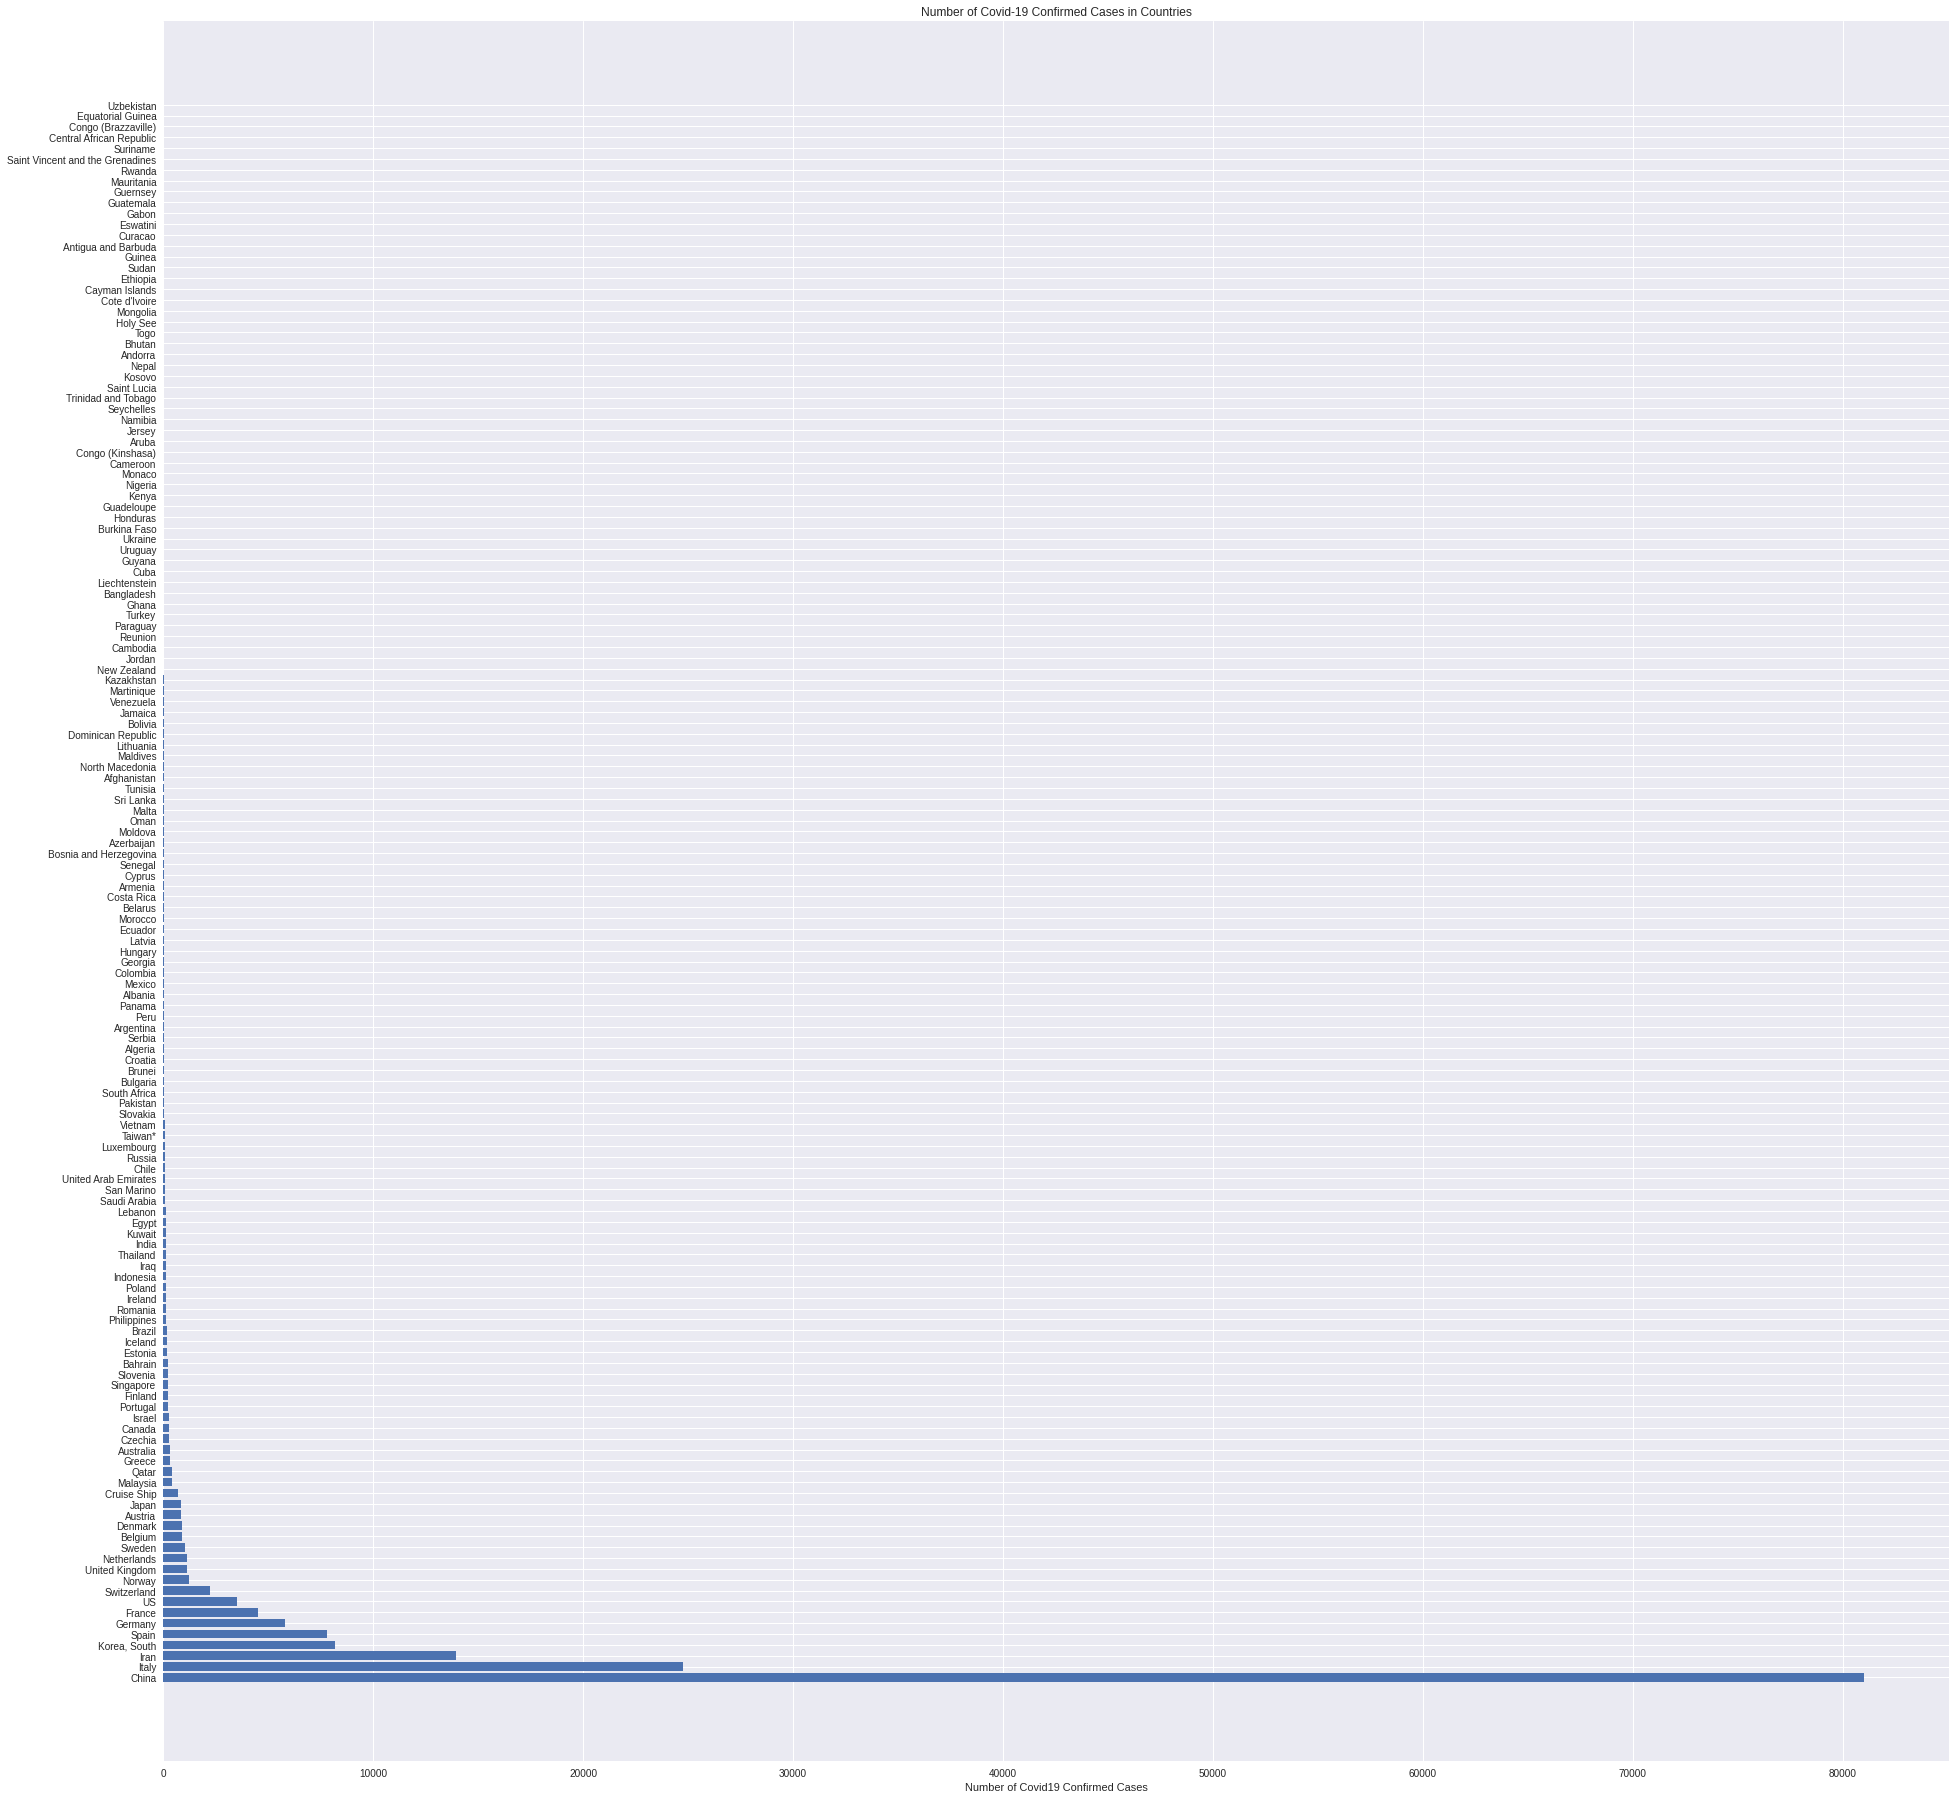

In [ ]:
# Plot a bar graph to see the total confirmed cases across different countries

plt.figure(figsize=(32, 32))
plt.barh(unique_countries, country_confirmed_cases)
plt.title('Number of Covid-19 Confirmed Cases in Countries')
plt.xlabel('Number of Covid19 Confirmed Cases')
plt.show()

In [ ]:
# Using Linear regression model to make predictions(confirmed)

from sklearn.linear_model import LinearRegression
linear_model = LinearRegression(normalize=True, fit_intercept=True)
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22, world_cases, test_size=0.15, shuffle=False)
linear_model.fit(X_train_confirmed, y_train_confirmed)
test_linear_pred = linear_model.predict(X_test_confirmed)
linear_pred = linear_model.predict(future_forecast)
print('MAE:', mean_absolute_error(test_linear_pred, y_test_confirmed))
MSE = mean_squared_error(test_linear_pred, y_test_confirmed)
print('MSE:', MSE)
RMSE = math.sqrt(MSE)
print('RMSE: ', RMSE)

MAE: 11965.537037037033
MSE: 307996364.0108404
RMSE:  17549.82518462336


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


In [ ]:
combine_out = np.vstack((world_cases,test_linear_pred))

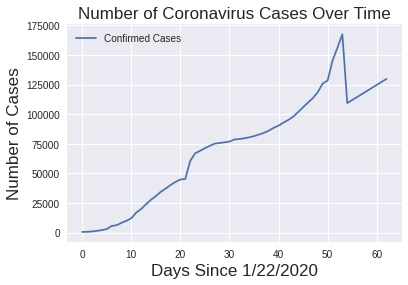

In [ ]:
plt.plot(combine_out)
plt.title('Number of Coronavirus Cases Over Time', size=17)
plt.xlabel('Days Since 1/22/2020', size=17)
plt.ylabel('Number of Cases', size=17)
plt.legend(['Confirmed Cases', 'Linear Regression Predictions'])

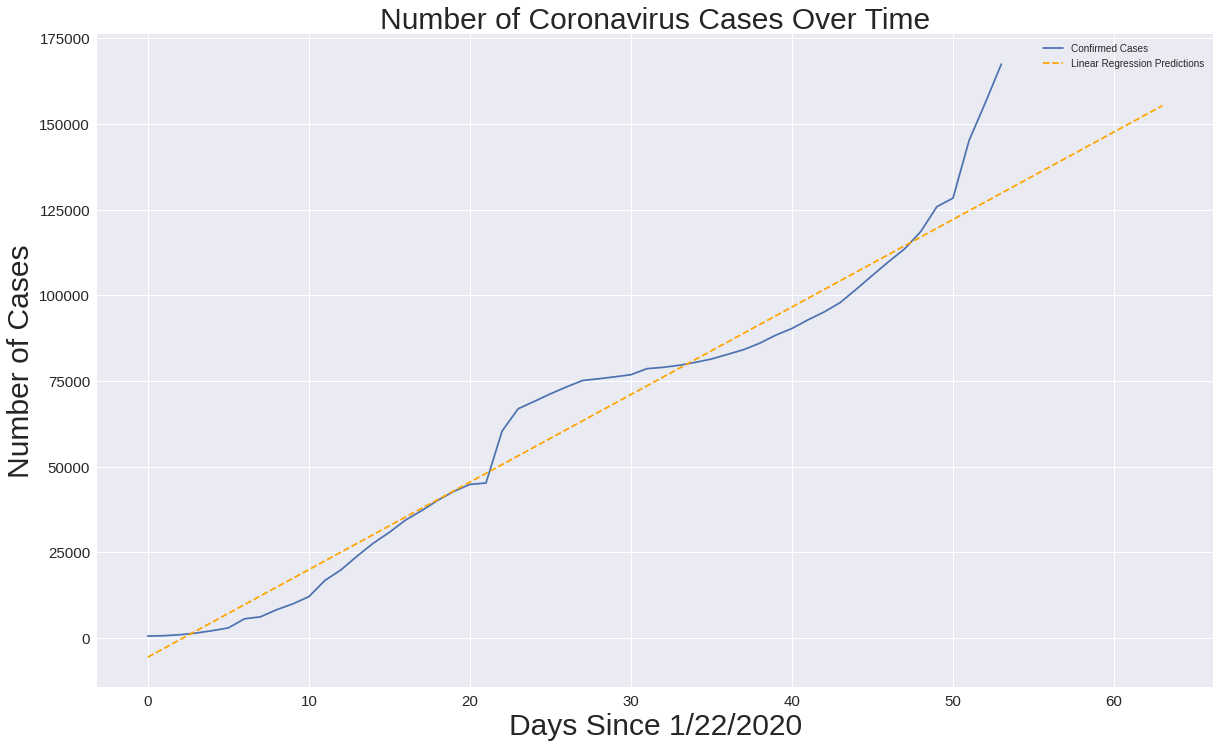

In [ ]:
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, world_cases)
plt.plot(future_forecast, linear_pred, linestyle='dashed', color='orange')
plt.title('Number of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.legend(['Confirmed Cases', 'Linear Regression Predictions'])
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


In [ ]:
# Predictions for the next 10 days using Linear Regression(confirmed)

print('Linear regression future predictions:')
print(linear_pred[-10:])

Linear regression future predictions:
[[132336.25252525]
 [134890.72222222]
 [137445.19191919]
 [139999.66161616]
 [142554.13131313]
 [145108.6010101 ]
 [147663.07070707]
 [150217.54040404]
 [152772.01010101]
 [155326.47979798]]


In [ ]:
X = days_since_1_22
y = world_cases
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22, world_cases, test_size=0.15, shuffle=False)
X_test = X_test_confirmed
poly = PolynomialFeatures(degree=2)
X_ = poly.fit_transform(X)
X_test_ = poly.fit_transform(X_test)
linear_pred = linear_model.predict(future_forecast)
# Instantiate
lg = LinearRegression()

# Fit
lg.fit(X_, y)

# Obtain coefficients
lg.coef_

array([[   0.        , 2332.39580849,    7.691926  ]])

In [ ]:
linear_pred_sqr=lg.predict(X_test_)

In [ ]:
linear_pred_sqr

array([[115296.26499224],
       [118328.6260666 ],
       [121376.37099295],
       [124439.4997713 ],
       [127518.01240165],
       [130611.90888399],
       [133721.18921833],
       [136845.85340467],
       [139985.901443  ]])

In [ ]:
combine_out = np.vstack((world_cases,linear_pred_sqr))

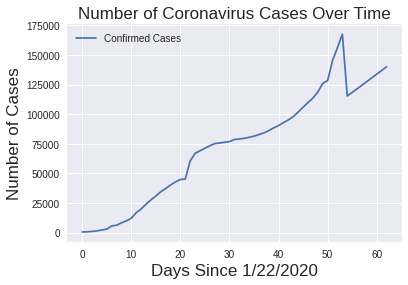

In [ ]:
plt.plot(combine_out)
plt.title('Number of Coronavirus Cases Over Time', size=17)
plt.xlabel('Days Since 1/22/2020', size=17)
plt.ylabel('Number of Cases', size=17)
plt.legend(['Confirmed Cases', 'Linear Regression Predictions'])

In [ ]:
print('MAE:', mean_absolute_error(linear_pred_sqr, y_test_confirmed))
MSE = mean_squared_error(linear_pred_sqr, y_test_confirmed)
print('MSE:', MSE)
RMSE = math.sqrt(MSE)
print('RMSE: ', RMSE)

MAE: 10419.971004746621
MSE: 169131996.17456436
RMSE:  13005.075785037332


In [ ]:
X = days_since_1_22
y = world_cases
X_test = X_test_confirmed
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22, world_cases, test_size=0.15, shuffle=False)
poly = PolynomialFeatures(degree=3)
X_ = poly.fit_transform(X)
X_test_ = poly.fit_transform(X_test)
linear_pred = linear_model.predict(future_forecast)
# Instantiate
lg = LinearRegression()

# Fit
lg.fit(X_, y)

# Obtain coefficients
lg.coef_

array([[ 0.00000000e+00,  4.19833977e+03, -8.11519051e+01,
         1.11753247e+00]])

In [ ]:
linear_pred_cube=lg.predict(X_test_)

In [ ]:
linear_pred_cube

array([[113336.33655305],
       [117090.84710707],
       [120991.49281162],
       [125044.97886152],
       [129258.01045155],
       [133637.29277652],
       [138189.53103122],
       [142921.43041044],
       [147839.696109  ]])

In [ ]:
combine_out = np.vstack((world_cases,linear_pred_cube))

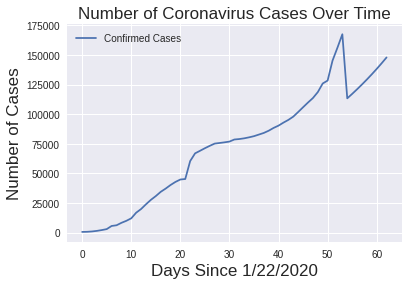

In [ ]:
plt.plot(combine_out)
plt.title('Number of Coronavirus Cases Over Time', size=17)
plt.xlabel('Days Since 1/22/2020', size=17)
plt.ylabel('Number of Cases', size=17)
plt.legend(['Confirmed Cases', 'Linear Regression Predictions'])

In [ ]:
print('MAE:', mean_absolute_error(linear_pred_cube, y_test_confirmed))
MSE = mean_squared_error(linear_pred_cube, y_test_confirmed)
print('MSE:', MSE)
RMSE = math.sqrt(MSE)
print('RMSE: ', RMSE)

MAE: 8574.477890075488
MSE: 94808210.52774853
RMSE:  9736.950781828391


In [ ]:
X = days_since_1_22
y = world_cases
X_test = X_test_confirmed
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22, world_cases, test_size=0.15, shuffle=False)
poly = PolynomialFeatures(degree=4)
X_ = poly.fit_transform(X)
X_test_ = poly.fit_transform(X_test)
linear_pred = linear_model.predict(future_forecast)
# Instantiate
lg = LinearRegression()

# Fit
lg.fit(X_, y)

# Obtain coefficients
lg.coef_

array([[ 0.00000000e+00, -3.20016539e+03,  5.60793450e+02,
        -1.78391059e+01,  1.78836211e-01]])

In [ ]:
linear_pred_quad=lg.predict(X_test_)

In [ ]:
linear_pred_quad

array([[104214.15689155],
       [108638.53679758],
       [113802.27711542],
       [119797.92442132],
       [126722.31736063],
       [134676.58664778],
       [143766.15506626],
       [154100.73746862],
       [165794.34077652]])

In [ ]:
combine_out = np.vstack((world_cases,linear_pred_quad))

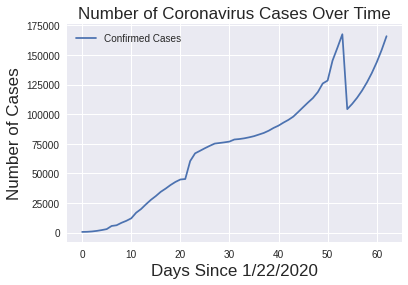

In [ ]:
plt.plot(combine_out)
plt.title('Number of Coronavirus Cases Over Time', size=17)
plt.xlabel('Days Since 1/22/2020', size=17)
plt.ylabel('Number of Cases', size=17)
plt.legend(['Confirmed Cases', 'Linear Regression Predictions'])

In [ ]:
print('MAE:', mean_absolute_error(linear_pred_quad, y_test_confirmed))
MSE = mean_squared_error(linear_pred_quad, y_test_confirmed)
print('MSE:', MSE)
RMSE = math.sqrt(MSE)
print('RMSE: ', RMSE)

MAE: 1831.0198382906772
MSE: 6115553.428541872
RMSE:  2472.964502078805


In [ ]:
#Predictions for the next 10 days using Linear Regression(confirmed(sqr))
#from sklearn.linear_model import LinearRegression
#linear_model = LinearRegression(normalize=True, fit_intercept=True)
#X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22_sqr, world_cases, test_size=0.15, shuffle=False)
#linear_model.fit(X_train_confirmed, y_train_confirmed)
#test_linear_pred = linear_model.predict(X_test_confirmed)
#linear_pred_sqr = linear_model.predict(future_forecast_sqr)
#print('MAE:', mean_absolute_error(test_linear_pred, y_test_confirmed))
#MSE = mean_squared_error(test_linear_pred, y_test_confirmed)
#print('MSE:', MSE)
#RMSE = math.sqrt(MSE)
#print('RMSE: ', RMSE)

In [ ]:
# plt.figure(figsize=(20, 12))
# plt.plot(adjusted_dates, world_cases)
# plt.plot(future_forecast, linear_pred_sqr, linestyle='dashed', color='orange')
# plt.title('Number of Coronavirus Cases Over Time', size=30)
# plt.xlabel('Days Since 1/22/2020', size=30)
# plt.ylabel('Number of Cases', size=30)
# plt.legend(['Confirmed Cases', 'Linear Regression Predictions'])
# plt.xticks(size=15)
# plt.yticks(size=15)
# plt.show()

In [ ]:
# Predictions for the next 10 days using Linear Regression(confirmed(sqr))

# print('Linear regression future predictions:')
# print(linear_pred_sqr[-10:])

In [ ]:
# from sklearn.linear_model import LinearRegression
# linear_model = LinearRegression(normalize=True, fit_intercept=True)
# X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22_cube, world_cases, test_size=0.15, shuffle=False)
# linear_model.fit(X_train_confirmed, y_train_confirmed)
# test_linear_pred = linear_model.predict(X_test_confirmed)
# linear_pred_cube = linear_model.predict(future_forecast_cube)
# print('MAE:', mean_absolute_error(test_linear_pred, y_test_confirmed))
# MSE = mean_squared_error(test_linear_pred, y_test_confirmed)
# print('MSE:', MSE)
# RMSE = math.sqrt(MSE)
# print('RMSE: ', RMSE)

In [ ]:
# plt.figure(figsize=(20, 12))
# plt.plot(adjusted_dates, world_cases)
# plt.plot(future_forecast, linear_pred_cube, linestyle='dashed', color='orange')
# plt.title('Number of Coronavirus Cases Over Time', size=30)
# plt.xlabel('Days Since 1/22/2020', size=30)
# plt.ylabel('Number of Cases', size=30)
# plt.legend(['Confirmed Cases', 'Linear Regression Predictions'])
# plt.xticks(size=15)
# plt.yticks(size=15)
# plt.show()

In [ ]:
# Using Linear regression model to make predictions(deaths)

from sklearn.linear_model import LinearRegression
linear_model = LinearRegression(normalize=True, fit_intercept=True)
X_train_deaths, X_test_deaths, y_train_deaths, y_test_deaths = train_test_split(days_since_1_22, total_deaths, test_size=0.15, shuffle=False)
linear_model.fit(X_train_deaths, y_train_deaths)
test_linear_pred_death = linear_model.predict(X_test_deaths)
linear_pred_death = linear_model.predict(future_forecast)

print('MAE:', mean_absolute_error(test_linear_pred_death, y_test_deaths))
print('MSE:',mean_squared_error(test_linear_pred_death, y_test_deaths))
RMSE = math.sqrt(MSE)
print('RMSE: ', RMSE)

MAE: 863.0823451910401
MSE: 1230311.8294333695
RMSE:  2472.964502078805


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


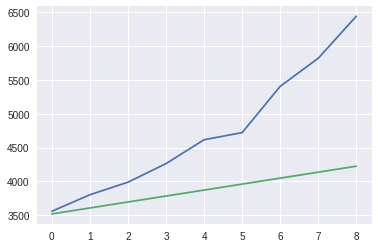

In [ ]:
plt.plot(y_test_deaths)
plt.plot(test_linear_pred_death)

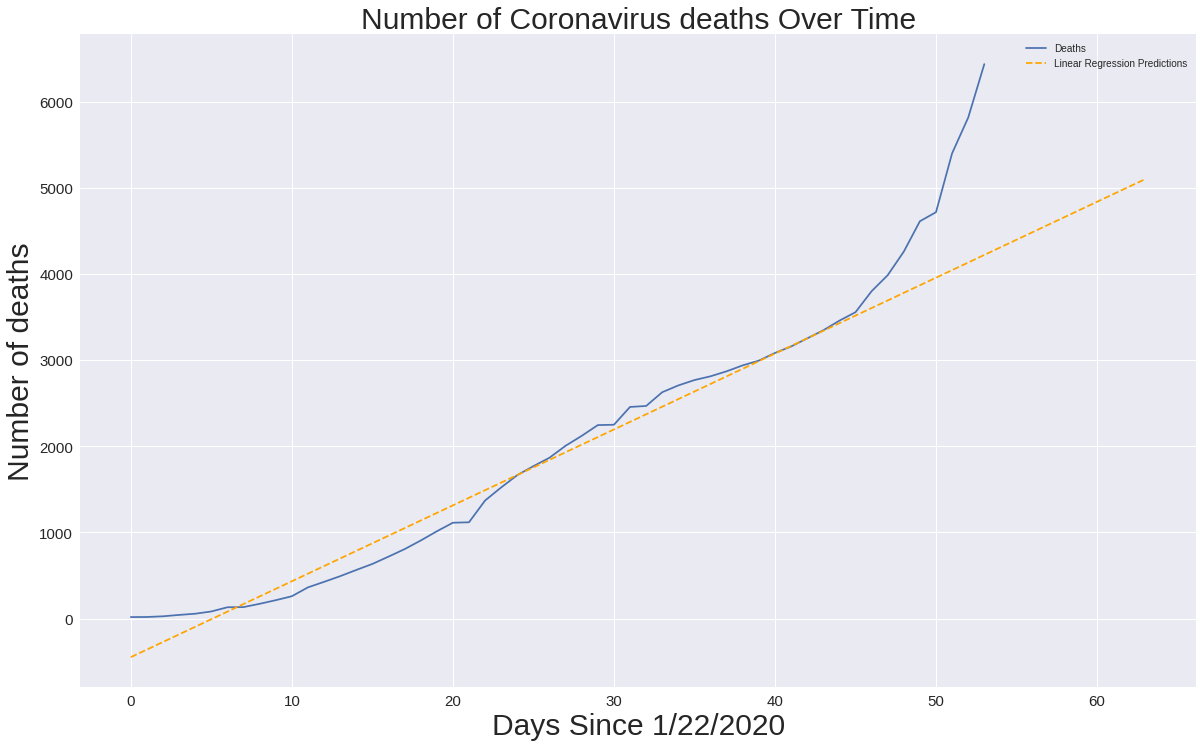

In [ ]:
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, total_deaths)
plt.plot(future_forecast, linear_pred_death, linestyle='dashed', color='orange')
plt.title('Number of Coronavirus deaths Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Number of deaths', size=30)
plt.legend(['Deaths', 'Linear Regression Predictions'])
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

In [ ]:
# Predictions for the next 10 days using Linear Regression(deaths)

print('Linear regression future predictions:')
print(linear_pred_death[-10:])

Linear regression future predictions:
[[4311.92709706]
 [4400.08454106]
 [4488.24198507]
 [4576.39942907]
 [4664.55687308]
 [4752.71431708]
 [4840.87176109]
 [4929.02920509]
 [5017.1866491 ]
 [5105.3440931 ]]


In [ ]:
X = days_since_1_22
y = total_deaths
X_test = X_test_confirmed
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22, total_deaths, test_size=0.15, shuffle=False)
poly = PolynomialFeatures(degree=2)
X_ = poly.fit_transform(X)
X_test_ = poly.fit_transform(X_test)
linear_pred = linear_model.predict(future_forecast)
# Instantiate
lg = LinearRegression()

# Fit
lg.fit(X_, y)

# Obtain coefficients
lg.coef_

array([[ 0.        , 30.23152314,  1.36674253]])

In [ ]:
linear_pred_death_sqr=lg.predict(X_test_)

In [ ]:
linear_pred_death_sqr

array([[4066.58176907],
       [4221.18686282],
       [4378.52544164],
       [4538.59750553],
       [4701.40305449],
       [4866.94208852],
       [5035.21460761],
       [5206.22061178],
       [5379.96010101]])

In [ ]:
combine_out = np.vstack((total_deaths,linear_pred_death_sqr))

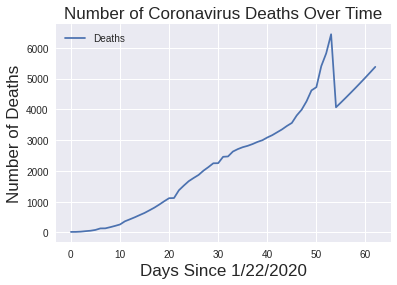

In [ ]:
plt.plot(combine_out)
plt.title('Number of Coronavirus Deaths Over Time', size=17)
plt.xlabel('Days Since 1/22/2020', size=17)
plt.ylabel('Number of Deaths', size=17)
plt.legend(['Deaths', 'Linear Regression Predictions'])

In [ ]:
print('MAE:', mean_absolute_error(linear_pred_death_sqr, y_test_confirmed))
MSE = mean_squared_error(linear_pred_death_sqr, y_test_confirmed)
print('MSE:', MSE)
RMSE = math.sqrt(MSE)
print('RMSE: ', RMSE)

MAE: 429.98237796445454
MSE: 258625.8488170337
RMSE:  508.5527001373935


In [ ]:
X = days_since_1_22
y = total_deaths
X_test = X_test_confirmed
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22, total_deaths, test_size=0.15, shuffle=False)
poly = PolynomialFeatures(degree=3)
X_ = poly.fit_transform(X)
X_test_ = poly.fit_transform(X_test)
linear_pred = linear_model.predict(future_forecast)
# Instantiate
lg = LinearRegression()

# Fit
lg.fit(X_, y)

# Obtain coefficients
lg.coef_

array([[ 0.00000000e+00,  7.98588845e+01, -9.96182080e-01,
         2.97223222e-02]])

In [ ]:
linear_pred_death_cube=lg.predict(X_test_)

In [ ]:
linear_pred_death_cube

array([[4014.45476041],
       [4188.26641877],
       [4368.28907388],
       [4554.7010597 ],
       [4747.68071014],
       [4947.40635915],
       [5154.05634066],
       [5367.8089886 ],
       [5588.8426369 ]])

In [ ]:
combine_out = np.vstack((total_deaths,linear_pred_death_cube))

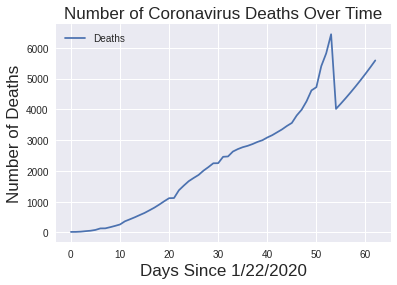

In [ ]:
plt.plot(combine_out)
plt.title('Number of Coronavirus Deaths Over Time', size=17)
plt.xlabel('Days Since 1/22/2020', size=17)
plt.ylabel('Number of Deaths', size=17)
plt.legend(['Deaths', 'Linear Regression Predictions'])

In [ ]:
print('MAE:', mean_absolute_error(linear_pred_death_cube, y_test_confirmed))
MSE = mean_squared_error(linear_pred_death_sqr, y_test_confirmed)
print('MSE:', MSE)
RMSE = math.sqrt(MSE)
print('RMSE: ', RMSE)

RMSE:  508.5527001373935


In [ ]:
# # Predictions for the next 10 days using Linear Regression(deaths(sqr))
# from sklearn.linear_model import LinearRegression
# linear_model = LinearRegression(normalize=True, fit_intercept=True)
# X_train_deaths, X_test_deaths, y_train_deaths, y_test_deaths = train_test_split(days_since_1_22_sqr, total_deaths, test_size=0.15, shuffle=False)
# linear_model.fit(X_train_deaths, y_train_deaths)
# test_linear_pred_death = linear_model.predict(X_test_deaths)
# linear_pred_death_sqr = linear_model.predict(future_forecast_sqr)
# print('MAE:', mean_absolute_error(test_linear_pred_death, y_test_deaths))
# print('MSE:',mean_squared_error(test_linear_pred_death, y_test_deaths))

In [ ]:
# plt.figure(figsize=(20, 12))
# plt.plot(adjusted_dates, total_deaths)
# plt.plot(future_forecast, linear_pred_death_sqr, linestyle='dashed', color='orange')
# plt.title('Number of Coronavirus deaths Over Time', size=30)
# plt.xlabel('Days Since 1/22/2020', size=30)
# plt.ylabel('Number of deaths', size=30)
# plt.legend(['Deaths', 'Linear Regression Predictions'])
# plt.xticks(size=15)
# plt.yticks(size=15)
# plt.show()

In [ ]:
 # Predictions for the next 10 days using Linear Regression(deaths)

# print('Linear regression future predictions:')
# print(linear_pred_death_sqr[-10:])

In [ ]:
# from sklearn.linear_model import LinearRegression
# linear_model = LinearRegression(normalize=True, fit_intercept=True)
# X_train_deaths, X_test_deaths, y_train_deaths, y_test_deaths = train_test_split(days_since_1_22, total_deaths, test_size=0.15, shuffle=False)
# linear_model.fit(X_train_deaths, y_train_deaths)
# test_linear_pred_death = linear_model.predict(X_test_deaths)
# linear_pred_death_cube = linear_model.predict(future_forecast_cube)
# print('MAE:', mean_absolute_error(test_linear_pred_death, y_test_deaths))
# print('MSE:',mean_squared_error(test_linear_pred_death, y_test_deaths))

In [ ]:
# plt.figure(figsize=(20, 12))
# plt.plot(adjusted_dates, total_deaths)
# plt.plot(future_forecast, linear_pred_death, linestyle='dashed', color='orange')
# plt.title('Number of Coronavirus deaths Over Time', size=30)
# plt.xlabel('Days Since 1/22/2020', size=30)
# plt.ylabel('Number of deaths', size=30)
# plt.legend(['Deaths', 'Linear Regression Predictions'])
# plt.xticks(size=15)
# plt.yticks(size=15)
# plt.show()

In [ ]:
# Using Linear regression model to make predictions(recovered)

from sklearn.linear_model import LinearRegression
linear_model = LinearRegression(normalize=True, fit_intercept=True)
X_train_recovered, X_test_recovered, y_train_recovered, y_test_recovered = train_test_split(days_since_1_22, total_recovered, test_size=0.15, shuffle=False)
linear_model.fit(X_train_recovered, y_train_recovered)
test_linear_pred_recovered = linear_model.predict(X_test_recovered)
linear_pred_recovered = linear_model.predict(future_forecast)
print('MAE:', mean_absolute_error(test_linear_pred_recovered, y_test_recovered))
print('MSE:',mean_squared_error(test_linear_pred_recovered, y_test_recovered))

MAE: 18220.28067632849
MSE: 337147862.92684984


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


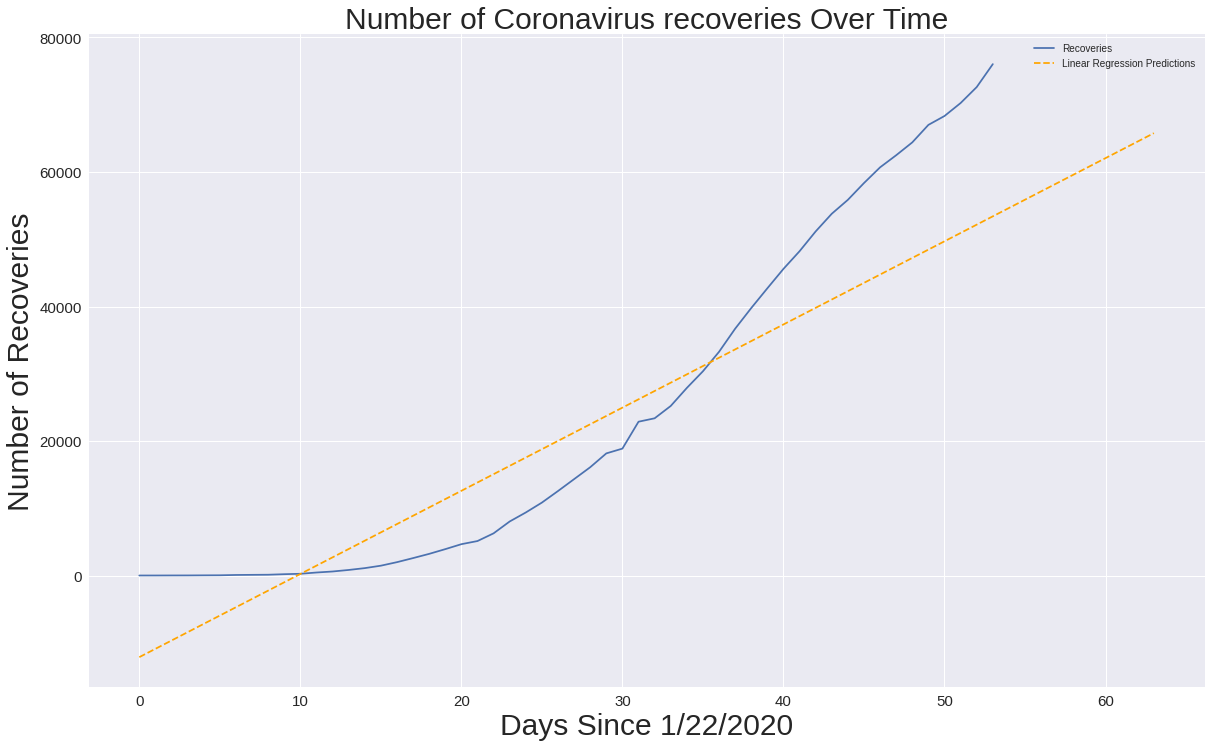

In [ ]:
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, total_recovered)
plt.plot(future_forecast, linear_pred_recovered, linestyle='dashed', color='orange')
plt.title('Number of Coronavirus recoveries Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Number of Recoveries', size=30)
plt.legend(['Recoveries', 'Linear Regression Predictions'])
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

In [ ]:
# Predictions for the next 10 days using Linear Regression(recoveries)

print('Linear regression future predictions:')
print(linear_pred_recovered[-10:])

Linear regression future predictions:
[[54648.13236715]
 [55884.34830918]
 [57120.56425121]
 [58356.78019324]
 [59592.99613527]
 [60829.21207729]
 [62065.42801932]
 [63301.64396135]
 [64537.85990338]
 [65774.07584541]]


In [ ]:
X = days_since_1_22
y = total_recovered
X_test = X_test_confirmed
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22, total_recovered, test_size=0.15, shuffle=False)
poly = PolynomialFeatures(degree=2)
X_ = poly.fit_transform(X)
X_test_ = poly.fit_transform(X_test)
linear_pred = linear_model.predict(future_forecast)
# Instantiate
lg = LinearRegression()

# Fit
lg.fit(X_, y)

# Obtain coefficients
lg.coef_

array([[   0.        , -423.15636868,   36.69040446]])

In [ ]:
linear_pred_recovered_sqr = lg.predict(X_test_)

In [ ]:
linear_pred_recovered_sqr

array([[55480.03633536],
       [58395.70677247],
       [61384.7580185 ],
       [64447.19007345],
       [67583.00293731],
       [70792.1966101 ],
       [74074.7710918 ],
       [77430.72638242],
       [80860.06248196]])

In [ ]:
combine_out = np.vstack((total_recovered,linear_pred_recovered_sqr))

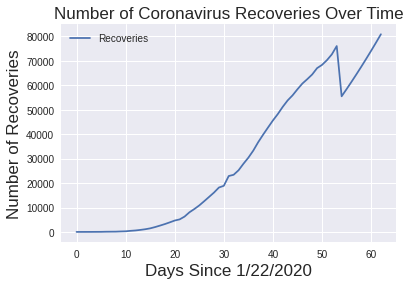

In [ ]:
plt.plot(combine_out)
plt.title('Number of Coronavirus Recoveries Over Time', size=17)
plt.xlabel('Days Since 1/22/2020', size=17)
plt.ylabel('Number of Recoveries', size=17)
plt.legend(['Recoveries', 'Linear Regression Predictions'])

In [ ]:

MSE = mean_squared_error(linear_pred_recovered_sqr, y_test_confirmed)
print('MSE:', MSE)
RMSE = math.sqrt(MSE)
print('RMSE: ', RMSE)

MSE: 9138025.626866985
RMSE:  3022.916741636624


In [ ]:
X = days_since_1_22
y = total_recovered
X_test = X_test_confirmed
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22, total_recovered, test_size=0.15, shuffle=False)
poly = PolynomialFeatures(degree=3)
X_ = poly.fit_transform(X)
X_test_ = poly.fit_transform(X_test)
linear_pred = linear_model.predict(future_forecast)
# Instantiate
lg = LinearRegression()

# Fit
lg.fit(X_, y)

# Obtain coefficients
lg.coef_

array([[ 0.00000000e+00, -1.13212759e+03,  7.04468951e+01,
        -4.24609945e-01]])

In [ ]:
linear_pred_recovered_cube = lg.predict(X_test_)

In [ ]:
linear_pred_recovered_cube

array([[56224.71725723],
       [58866.00474776],
       [61530.99368362],
       [64217.13640514],
       [66921.88525265],
       [69642.69256647],
       [72377.01068694],
       [75122.29195439],
       [77875.98870914]])

In [ ]:
combine_out = np.vstack((total_recovered,linear_pred_recovered_cube))

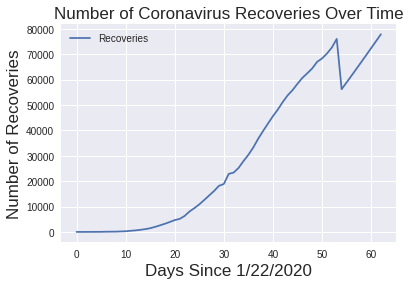

In [ ]:
plt.plot(combine_out)
plt.title('Number of Coronavirus Recoveries Over Time', size=17)
plt.xlabel('Days Since 1/22/2020', size=17)
plt.ylabel('Number of Recoveries', size=17)
plt.legend(['Recoveries', 'Linear Regression Predictions'])

In [ ]:
MSE = mean_squared_error(linear_pred_recovered_cube, y_test_confirmed)
print('MSE:', MSE)
RMSE = math.sqrt(MSE)
print('RMSE: ', RMSE)

MSE: 2750510.8103726953
RMSE:  1658.4664031486122


In [ ]:
# # Using Linear regression model to make predictions(recovered(sqr))

# from sklearn.linear_model import LinearRegression
# linear_model = LinearRegression(normalize=True, fit_intercept=True)
# X_train_recovered, X_test_recovered, y_train_recovered, y_test_recovered = train_test_split(days_since_1_22_sqr, total_recovered, test_size=0.15, shuffle=False)
# linear_model.fit(X_train_recovered, y_train_recovered)
# test_linear_pred_recovered = linear_model.predict(X_test_recovered)
# linear_pred_recovered_sqr = linear_model.predict(future_forecast_sqr)
# print('MAE:', mean_absolute_error(test_linear_pred_recovered, y_test_recovered))
# print('MSE:',mean_squared_error(test_linear_pred_recovered, y_test_recovered))

In [ ]:
# plt.figure(figsize=(20, 12))
# plt.plot(adjusted_dates, total_recovered)
# plt.plot(future_forecast, linear_pred_recovered_sqr, linestyle='dashed', color='orange')
# plt.title('Number of Coronavirus recoveries Over Time', size=30)
# plt.xlabel('Days Since 1/22/2020', size=30)
# plt.ylabel('Number of Recoveries', size=30)
# plt.legend(['Recoveries', 'Linear Regression Predictions'])
# plt.xticks(size=15)
# plt.yticks(size=15)
# plt.show()

In [ ]:
# # Predictions for the next 10 days using Linear Regression(recoveries(sqr))

# print('Linear regression future predictions:')
# print(linear_pred_recovered_sqr[-10:])